In [1]:
#import library
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
#load the data
data = pd.read_csv('titanic.csv')


- Handle the missing data under columns “Age” and “Cabin” by replacing the appropriate values
- Standardize the values found under column “Sex”, then apply one-hot encoding

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data[(data['Cabin'].isna()) & (data['Pclass'] == 1) & (data['Embarked'] == 'C')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C


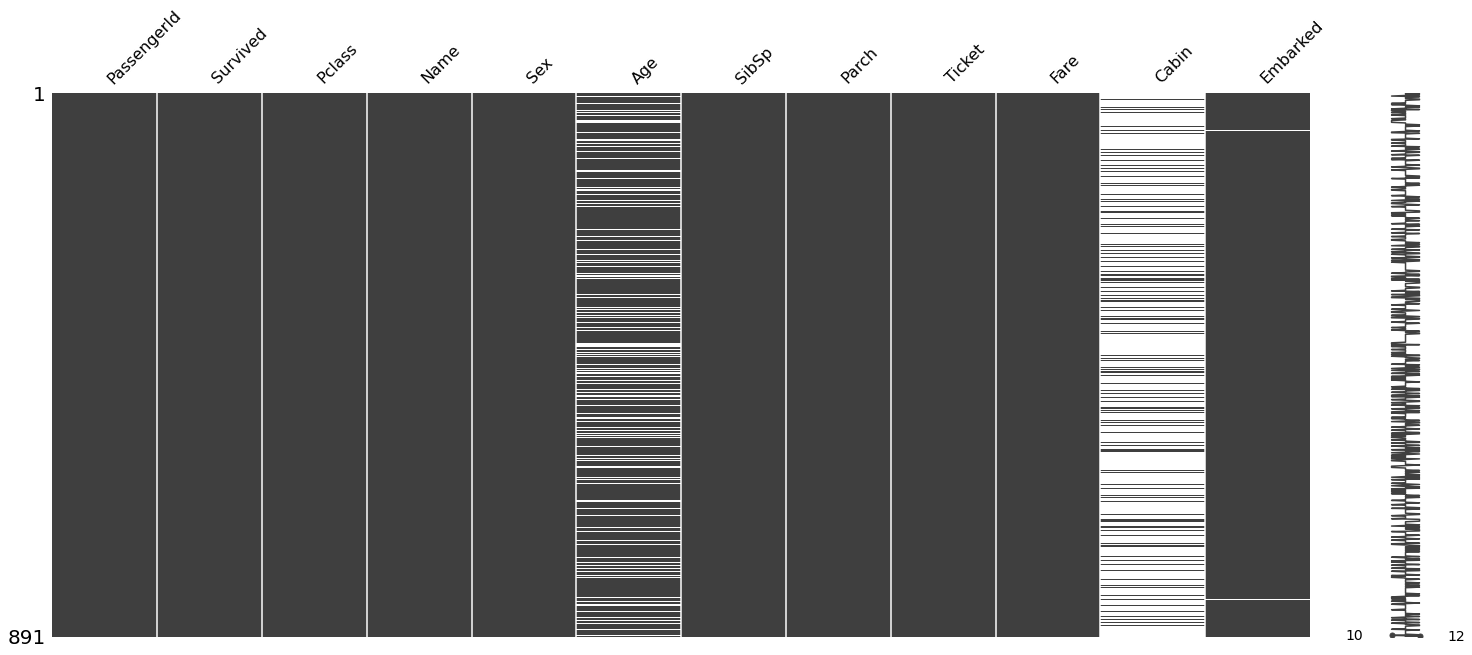

In [5]:
msno.matrix(data)
plt.show()

In [6]:
#Analyze missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#Handle missing values in Age by replacing values with the mean age of known values
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [8]:
# Handle missing values in Cabin

# Label encoding (Cabin presence/absence), replace NaN to 0 and 1 for Cabin that has values
# Create a new column indicating the presence or absence of Cabin information
data["Cabin_presence"] = data["Cabin"].notna().astype(int)  # 1 for present, 0 for missing
data.drop("Cabin", axis=1, inplace=True)


In [9]:
print(data['Sex'].unique())

['male' 'female' 'F' 'M']


In [10]:
#Standardize the values found under column “Sex”, then apply label encoding: convert m to 1, f to 0
data['Sex'].replace('male','m',inplace=True)
data['Sex'].replace('female','m', inplace=True)
data['Sex']= data['Sex'].str.lower()

data['Sex'] = data['Sex'].replace({'m':1,'f':0})


In [11]:
#Replace missing values in 'Embarked' to the most common value
embark_counts = data['Embarked'].value_counts()
# Find the value with the highest count
most_embark_value = embark_counts.idxmax()

# Replace missing values with the most frequent value
data['Embarked'].fillna(most_embark_value, inplace=True)


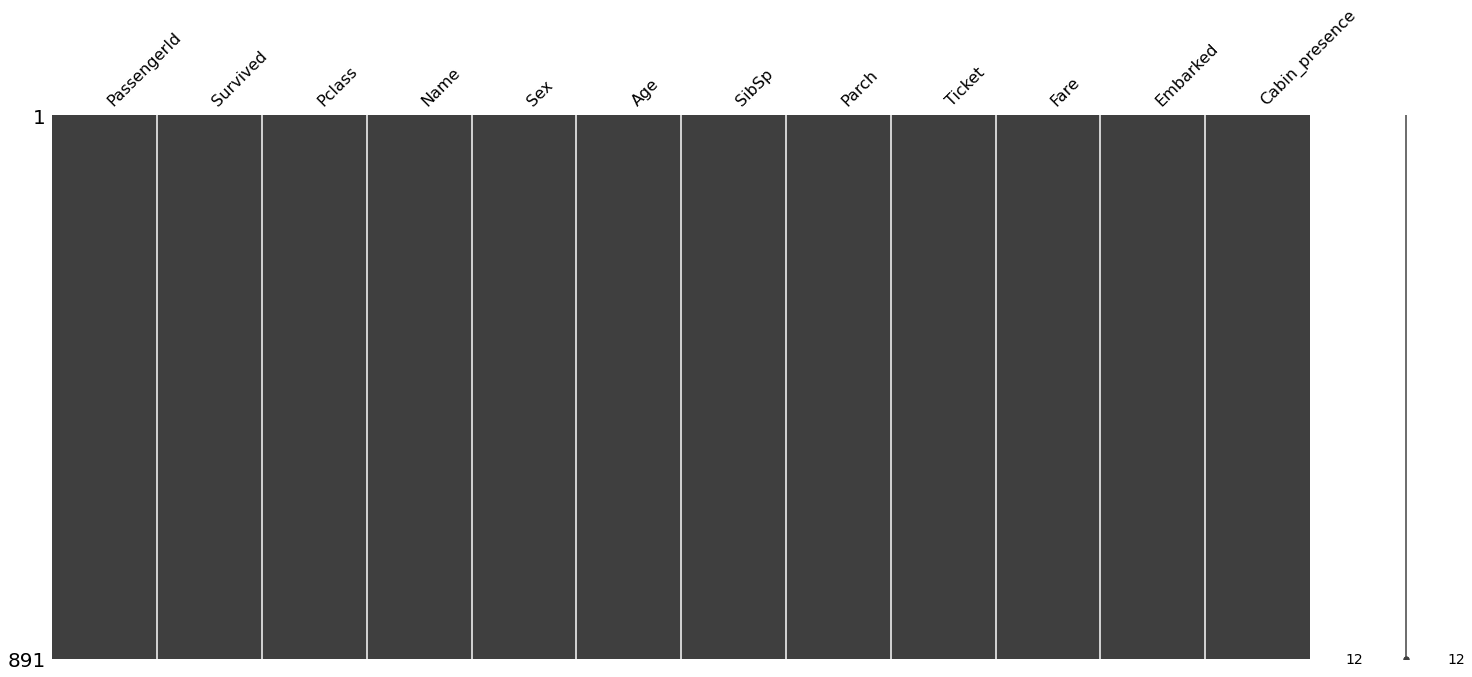

In [12]:
msno.matrix(data)
plt.show()

In [13]:
data.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Embarked           object
Cabin_presence      int32
dtype: object

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_presence
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,1


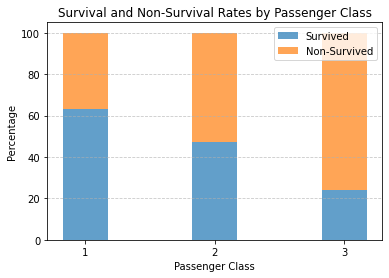

In [19]:
survival_rates = data[data['Survived'] == 1].groupby("Pclass").size() / data.groupby("Pclass").size() * 100
non_survival_rates = 100 - survival_rates

# Create the bar chart
width = 0.35  # the width of the bars
p1 = plt.bar(survival_rates.index, survival_rates, width, label='Survived', alpha=0.7)
p2 = plt.bar(non_survival_rates.index, non_survival_rates, width, bottom=survival_rates, label='Non-Survived', alpha=0.7)

plt.title("Survival and Non-Survival Rates by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Percentage")
plt.xticks(survival_rates.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

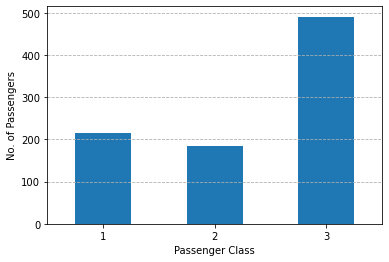

In [48]:
#Bar plot to display number of passenger on each class
pass_no = data.groupby('Pclass')['PassengerId'].count()
pass_no.plot(kind="bar")
plt.xlabel('Passenger Class', rotation=0)
plt.ylabel('No. of Passengers')
plt.grid(axis='y',linestyle='--')
plt.xticks(rotation=0)
plt.show()

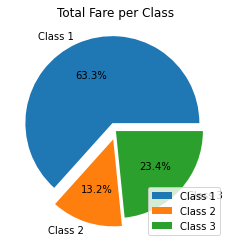

In [18]:
# Using Pie Chart to show the Breakdown of Total Fare by Passenger Class on the Titanic

total_classfare = data.groupby("Pclass")["Fare"].sum().reset_index()

# Plot the pie chart
plt.pie(total_classfare["Fare"], labels=[f"Class {pclass}" for pclass in total_classfare["Pclass"]],
        autopct="%1.1f%%", explode=(0.1, 0.1, 0))  # Adjust explode for emphasis
plt.title('Total Fare per Class')
plt.legend(labels=[f"Class {pclass}" for pclass in total_classfare["Pclass"]], loc='lower right')  
plt.show()

In [21]:
#Age Distribution: Histogram or Kernel Density Plot (KDE): Analyze the age distribution of passengers to identify age groups.

In [22]:
#Embarked Port Analysis:Bar Plot or Count Plot: Explore the number of passengers embarked from each port (C, Q, S).

In [23]:
# Survival by Passenger Class and Sex: Grouped Bar Plot or Heatmap: Examine survival rates by combining passenger class and gender.

In [24]:
#Survival by Age Group: Box Plot or Violin Plot: Visualize survival by age groups to identify trends.
